# Palmer Penguins
***

This notebook contains an analysis of the Palmer penguin [dataset](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv) (Horst AM, Hill AP, Gorman KB, 2020). Data was collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER (Long Term Ecological Research Network).

This dataset was created as a introductory dataset for data analysis and exploration. More about the dataset can be found [here.](https://allisonhorst.github.io/palmerpenguins/)

![penguins](./img/peng-2.png#center)

The datsaset documents three penguin species in the Palmer Archipelago, Antarctica.

![palmer achipelago](https://upload.wikimedia.org/wikipedia/commons/1/15/Palmer_archipelago%2C_Antarctica.jpg)

In order to explore the dataset we must first read in the dataset from a csv file. This can be done with a library called [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html). Pandas is an open source data analysis library for Python. Under the hood is [NumPy](https://numpy.org/), a library for operating on large arrays and matrices.

Before we can use Pandas, we must import it. Note in the cell below how the name Pandas is abbreviated to 'pd', for ease of use later.

In [2]:
# import the pandas library
import pandas as pd

# matplotlib is a polular plotting library
# import (part of) matplotlib 
import matplotlib.pyplot as plt

# seaborn is another popular statistical plotting library
import seaborn as sns

With Pandas imported, we can now load the dataset into a [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). A dataframe is a two dimensional data structure similar to a spreadsheet. It contains rows and columns just like a spreadsheet does.

In [3]:
# load local csv
df = pd.read_csv("./palmerpenguins_dataset.csv")

# load dataset from web directly
#df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Now that Pandas has read the dataset in as a dataframe, what can we do with it? How can we view the data? How can we perform math on the data inside? How can we plot the data?

[*10 minutes to pandas*](https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas) is a great introductory overview of the functionality Pandas provide for working with dataframes.

Pandas docs have a good overview of basic operations [here](https://pandas.pydata.org/docs/reference/frame.html).

One of the first things to do would be to have a quick look inside. The dataframe may be too large to display, so there is a built in function to display a small version of the table - just the top and bottom:

In [4]:
# view a small version of the dataframe
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We can see the column names. We can see how many rows there are in total. We also see that some entries are missing, represented by NaN. 

In [5]:
# check how many missing entries in each column
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# check how many missing entries in each column as a percentage
df.isna().mean().mul(100)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

3 % of the entries are missing gender info.

In [7]:
# view the first row in the dataframe
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In the first row we see all the data related to a single penguin. Its a male penguin weighing almost 4 kilograms, observed on the Torgersen island. Note that the data type is defined as an 'object'.

We can see what other datatypes are in the dataframe:

In [8]:
# view datatypes
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Some entries are `objects` and some are `float64`. What does that mean? Objects are structures used to hold strings (or mixed strings and numbers). They are basically just columns that contains strings. Only string operations can be performed on 'objects', such as concatenation. 

Float64 is more obvious, it is a floating point number (a decimal e.g. 1.0)

Note at the bottom of the output `dtype: object`. Thats referring to the Dataframe itself. The dataframe itself is an object. We could make a new dataframe with only the numric columns, and see what datatype the dataframe is then:

In [9]:
# creat new numeric-only df, select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

In [10]:
# now check the datatpyes of the new numeric-only dataframe
numeric_df.dtypes

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object

So it turns out that the dataframe is still an `object`, even though it only contains floats. This is because the dataframe itself is a complex structure that has more to it than just the columns contained inside. I guess it has metadata and that for how to behave like a spreadsheet or whatever, so it knows what things like columns or rows are i.e. its 2-dimensional.

Heres a quote from the Pandas docs regarding the Dataframe 
>Can be thought of as a dict-like container for Series objects.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame

Let's have a quick look at the column names again, also known as headers:

In [11]:
# view headers 
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

We can see the column headings, one of which is the sex of the penguin.

Let's try make a barchart to see how many of the penguins in the dataset are male and how many are female.


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [12]:
# count the number of unique entries in each of the columns
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

This has counted the number of unique entries in each column. I need to count how many of each unique entries there are. Maybe with Dataframe.count:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html

In [13]:
# count how many entries there are under each column
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

The function "value_counts()" counts the number of values for each of the unique entries in a column.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts

In [14]:
# count number of values for each unique value in a given column
df["sex"].value_counts()


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

## Plotting with pandas

Pandas has a built in plot function 'plot'. This uses another library call matplotlib under the hood.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='sex', ylabel='Count'>

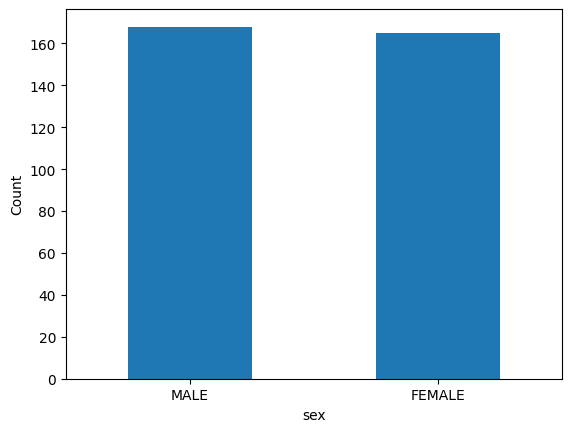

In [61]:
# count number of entries in the 'sex' column
gender_counts = df["sex"].value_counts()

# plot the gender counts
gender_counts.plot.bar(rot=0, ylabel="Count")

Species might be a better thing to barchart ...

<Axes: xlabel='species'>

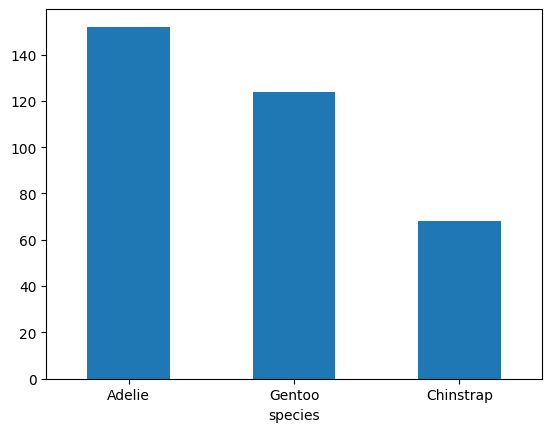

In [19]:
# count each of the entries under 'specise' column and assign to a variable
species_count = df["species"].value_counts()

# display the plot
species_count.plot.bar(rot=0)

In the bar chart its easy to see that the Adelie penguin is the most documented in the dataset.

<Axes: ylabel='count'>

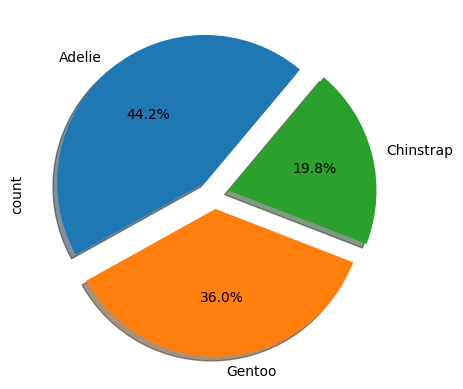

In [62]:
# plot a piechart, add percentage, explode the chart, and rotate
species_count.plot.pie(autopct='%.1f%%', explode=(0.1, 0.1, 0.1), shadow=True, startangle=50)

## Plotting with matplotlib

Lets try to put two barcharts together using a *stateless* approach.

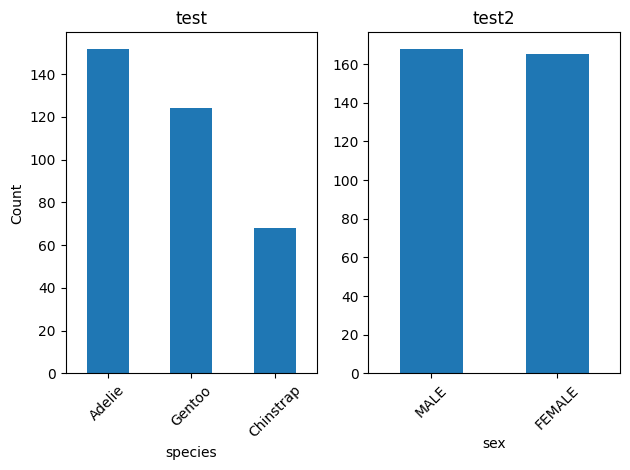

In [55]:
# set up the canvas to have subplots
# (1, 2) sets how many subplots: one row, two columns
fig, axes = plt.subplots(1, 2) 
# note the size of the plot could be set using figsize=(x, y))

# plot species count
df['species'].value_counts().plot(kind='bar', ylabel="Count",rot=45, ax=axes[0])

# plot sex count
df['sex'].value_counts().plot(kind='bar',rot=45, ax=axes[1])

# add titles 
axes[0].set_title('test') 
axes[1].set_title('test2') 

# auto adjust layout of plots using tight_layout()
plt.tight_layout()

That should work with different kinds of plots too, like one barchart and one scatter.

## Querying the dataframe

Lets use query function to look around the dataset. We can pass multiple criteria into the query function:

In [21]:
# query 2 things
df.query('species=="Adelie" & sex=="FEMALE"')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
...,...,...,...,...,...,...,...
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
144,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE


In [22]:
# query 
df.query('sex=="MALE" & body_mass_g>3000')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


We could use the query to see maybe where all the bigger than average penguins are at.

Another question is: Are all the species on one island or spread between all three?

In [23]:
# query
df.query('species=="Gentoo"')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [24]:
# set display options to show all columns and rows
df.query('species=="Adelie"')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


So seems like Adelie are on all three islands. How can I query it to display which islands each species is on in a succint way?
** see groupby() stuff later **

## Statistics

Writing math formula:
- https://docs.github.com/en/get-started/writing-on-github/working-with-advanced-formatting/writing-mathematical-expressions

This sentence uses `$` delimiters to show math inline:  $\bar{x} = \frac{sum of data points}{\# of data points}$

Use double \$\$ to center:
$$\bar{x} = \frac{sum of data points}{\# of data points}$$

**Mean**
$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$

An statistical overview of the dataframe can be easily done using the df.describe() method.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

This only includes numeric columns, unless instructed otherwise.

In [68]:
# view statistics overview
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Determine the mean using pandas built in function.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [67]:
# calculate the mean of each of the numeric columns in the dataframe
df.mean(numeric_only=True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

Determine the mean for a single column only.

In [27]:
# calculate the mean of a specific column
df['body_mass_g'].mean()

4201.754385964912

link above suggests "group_by" function
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

so we first do a group_by thing(), then do the maen() of the entries of another column that are associated with each group 

- https://www.statology.org/pandas-mean-by-group/

In [28]:
# group by species and then use mean() function to calculate the mean body weight for each unique species entry
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [64]:
# save mean by species to a variable 
avg_weight_by_species = df.groupby('species')['body_mass_g'].mean()

# display to console
print(avg_weight_by_species)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


<Axes: title={'center': 'Average body mass'}, xlabel='species', ylabel='Grams'>

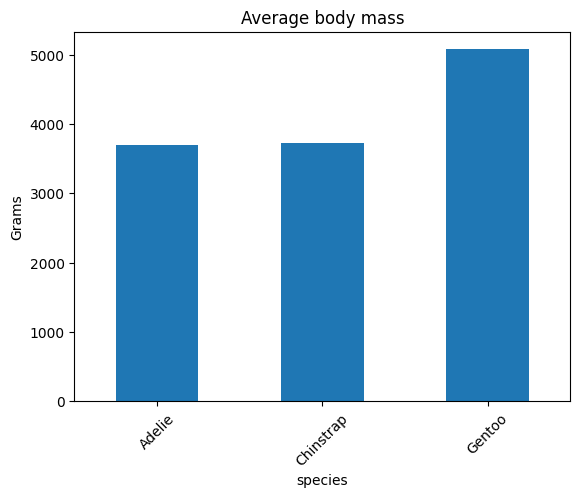

In [30]:
# display a plot of the average weight by species
avg_weight_by_species.plot.bar(title="Average body mass", ylabel="Grams", rot=45)

The groupby() function can be used for a question I had earlier, are each species confined to one island only, or spread around all three?

In [31]:
# group by 'species' and then see unique values in the 'island' column
df.groupby('species')['island'].unique()

species
Adelie       [Torgersen, Biscoe, Dream]
Chinstrap                       [Dream]
Gentoo                         [Biscoe]
Name: island, dtype: object

We see Chinstrap and Gentoo stick to one island, Adelie are all over the place.

Now I wonder are the Adelie mostly on one island or are they distriubted evenly throughout all three islands? How can I query that ...

In [32]:
# group by 'species' and then see value counts for the 'island' column
df.groupby('species')['island'].value_counts()

species    island   
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: count, dtype: int64

Where are the biggest penguins? Use nlargest():

In [33]:
# check the 5 largest penguins5
df.nlargest(5, 'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE


And smallest?

In [34]:
# check the 5 largest penguins5
df.nsmallest(5, 'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,FEMALE
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,FEMALE
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,FEMALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE


I just discovered that you can write a column name directly into the syntax like this:

In [35]:
# print unique entries under 'species' column
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Not sure how useful that is yet.

## Plotting histograms using various methods

Pandas has a built in tools for plotting histograms.

Basic version: hist()

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

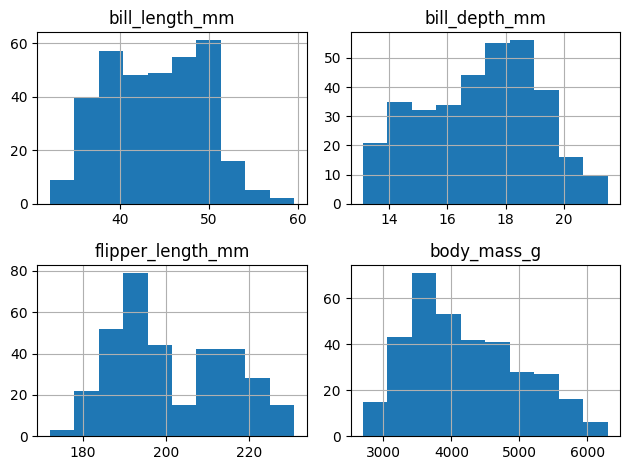

In [73]:
# plot a histogram using the basic hist() method
df.hist()
plt.tight_layout()

Better version with more control: plot.hist()

We can group using the "by" parameter

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

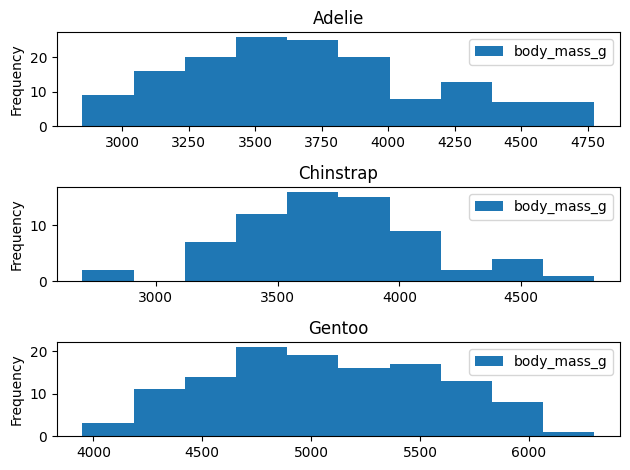

In [74]:
# plot histogram of body mass using pandas
df.plot.hist(column=["body_mass_g"], by="species")
plt.tight_layout()

Plot histograms using matplotlib.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

In [ ]:
# group by species
body_mass_by_species = df.groupby('species')['body_mass_g']

# specify the species to plot
species = 'Gentoo'

# get the data for the specified species
species_to_plot = body_mass_by_species.get_group(species)

# plot histogram for the specified species
#plt.figure()
plt.hist(species_to_plot, bins=10, alpha=0.5)

# decorate plot
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Body Mass - {species}')

# display the plot
plt.show()

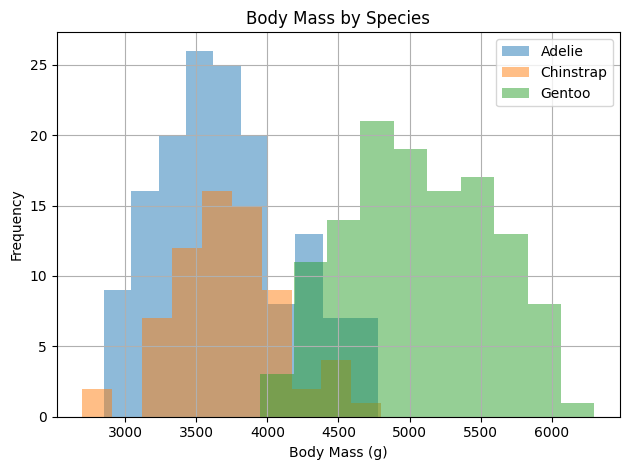

In [59]:
# group by species
body_mass_by_species = df.groupby('species')['body_mass_g']

# plotting histogram
fig, axes = plt.subplots(1, 1)
body_mass_by_species.hist(bins=10, alpha=0.5, ax=axes)

# decorate plot
axes.set_xlabel('Body Mass (g)')
axes.set_ylabel('Frequency')
axes.set_title('Body Mass by Species')

# add legend
axes.legend(body_mass_by_species.groups.keys())

# auto-adjust plot dimensions
plt.tight_layout()

# show the plot
plt.show()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


heatmaps look cool, matplotlib or seaborn. uses df.corr
- https://statisticsglobe.com/plot-correlation-matrix-matplotlib-seaborn-python

<Axes: >

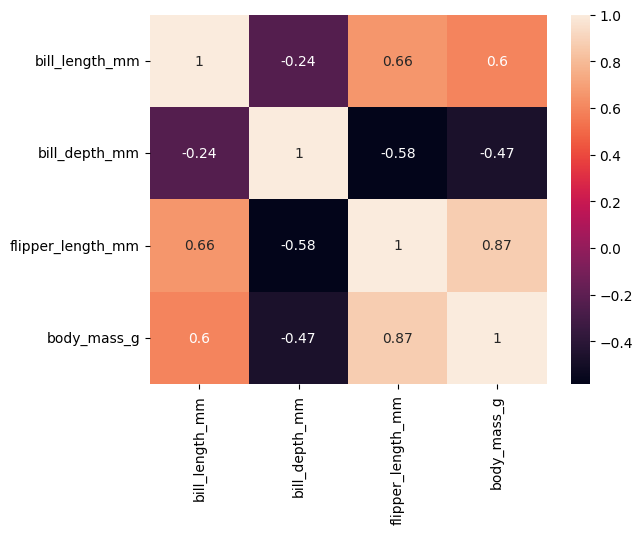

In [41]:
# plot a heatmap 
sns.heatmap(df.corr(numeric_only=True), annot=True)

The greatest correlation is flipper length to body mass. What does that mean? Lets have a look at those two variables using a scatterplot.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

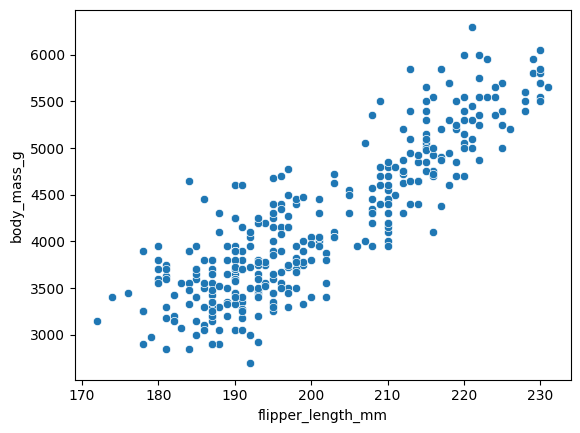

In [42]:
# create a scatter plot
sns.scatterplot(df, x='flipper_length_mm', y='body_mass_g')

Can we fit a line to it? Apparently [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) is for that. Seaborn describes regression things [here](https://seaborn.pydata.org/tutorial/regression.html). What is regression? [Libretexts](https://stats.libretexts.org/Courses/Concord_University/Elementary_Statistics/10%3A_Linear_Regression_and_Correlation/10.04%3A_The_Regression_Equation) has a good course on Linear Regression and Correlation. The [line of best fit](https://math.libretexts.org/Bookshelves/Algebra/Intermediate_Algebra_(Arnold)/03%3A_Linear_Functions/3.05%3A_The_Line_of_Best_Fit) approximates the data in a linear way.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

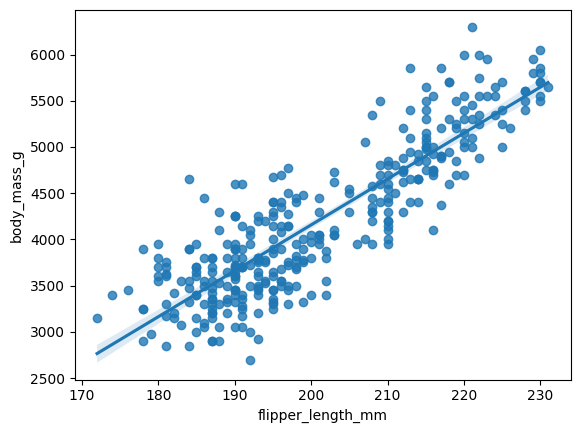

In [43]:
# create scatter plot using regplot()
sns.regplot(df, x='flipper_length_mm', y='body_mass_g')

The least correlation was flipper length and bill depth, lets scatter plot those:

<Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

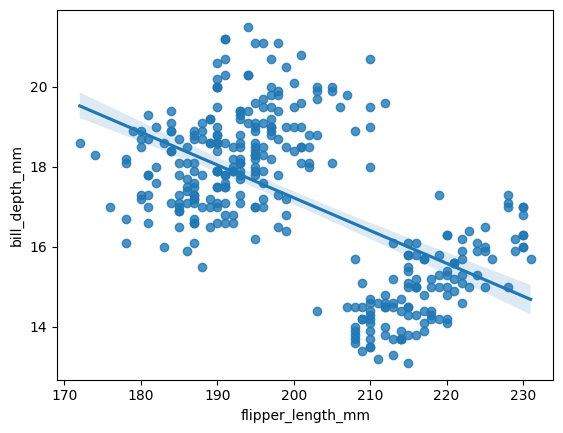

In [44]:
# scatter plot
sns.regplot(df, x='flipper_length_mm', y='bill_depth_mm')

You can see the line doesnt fit as good. Less correlation.

[lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) is like regplot but you can add a 'hue' related to another variable.

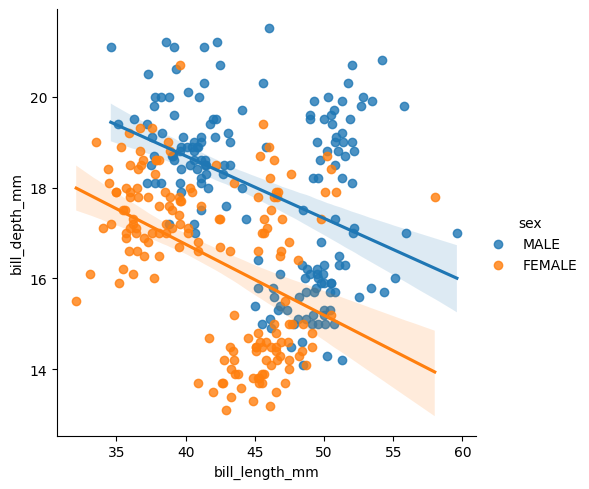

In [45]:
# scatter plot using lmplot()
sns.lmplot(df, x="bill_length_mm", y="bill_depth_mm", hue="sex")

We see two lines of best fit, one for female and one for male.

What about color by species:

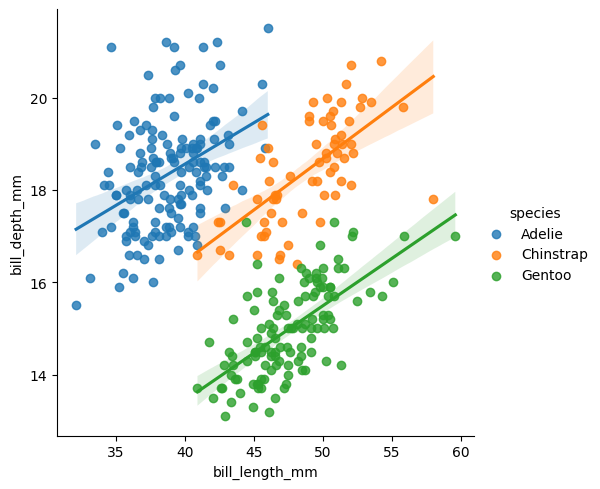

In [46]:
# scatter plot using lmplot()
sns.lmplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species")

There are three species so we see three lines of best fit.

[pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) is crazy.

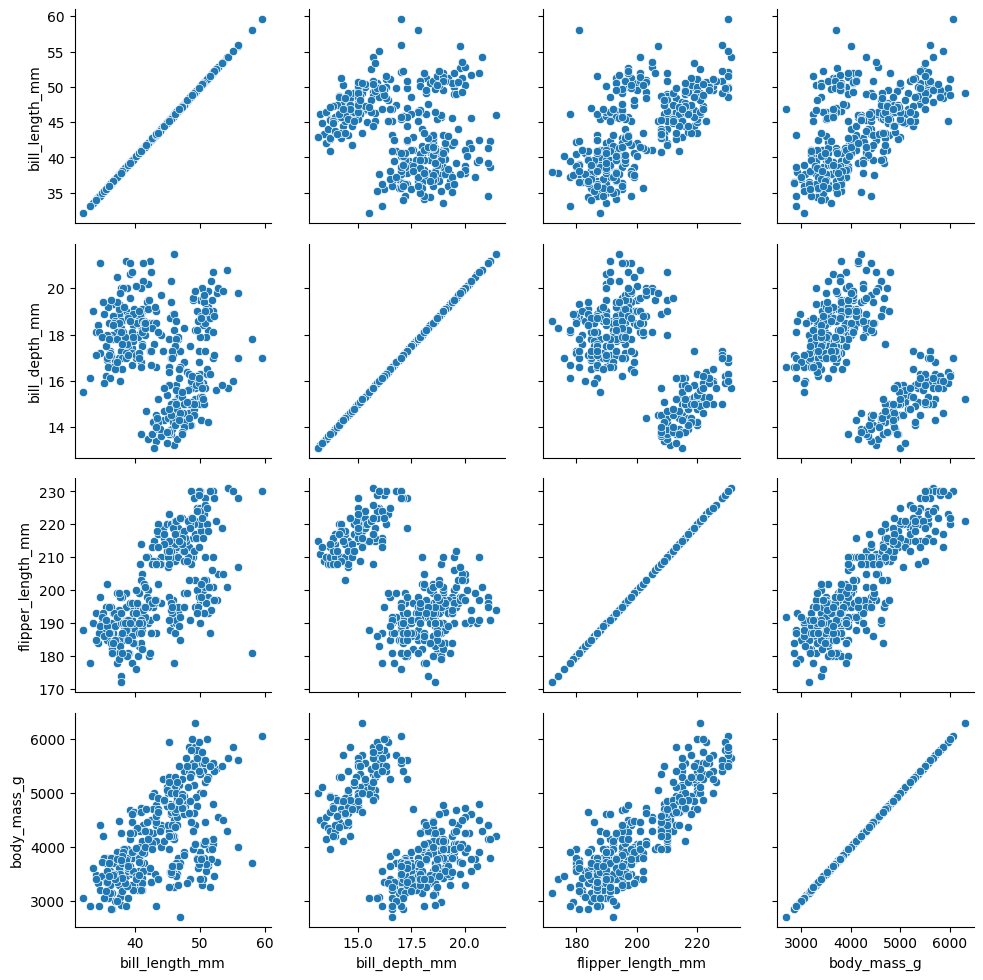

In [47]:
# pairgrid is crazy, a heatmap with scatterplots instead of colours
sns.PairGrid(df).map(sns.scatterplot)

***

### End